In [1]:
from datetime import date

import pandas_datareader.data as web
import pandas as pd
import matplotlib.ticker as mtick

In [2]:
report_start = date.fromisoformat('2020-01-01')
report_end = date.today()

In [3]:
data = (
    web.get_data_fred(
        ["DGS5", "DGS10", "T5YIE", "T10YIE", "T10Y2Y", "T10Y3M"],
        report_start,
        report_end,
    )
    / 100.0
)
data.dropna(inplace=True)

columns_with_semiannual_comp = [0, 1, 3, 4]

# Converting all CMT Yields to APY (i.e. all but breakdown inflation rates)
data.iloc[:, columns_with_semiannual_comp] = (data.iloc[:, columns_with_semiannual_comp]/2 + 1) ** 2 - 1

In [4]:
data['10y Tr. Yield - 5y Tr. Yield'] = data.DGS10 - data.DGS5
data['10y Breakdown Infl. Rate - 5y Breakdown Infl. Rate'] = data.T10YIE - data.T5YIE
data.rename(columns={'T10Y2Y':'10y Tr. Yield - 2y Tr. Yield',
                     'T10Y3M':'10y Tr. Yield - 3m Tr. Yield'}, inplace=True)

In [5]:
# Get rid columns no longer required
data.drop(columns=data.columns[0:4], inplace=True)

# Rearrange columns
data = data.iloc[:, [2, 3, 0 ,1]]

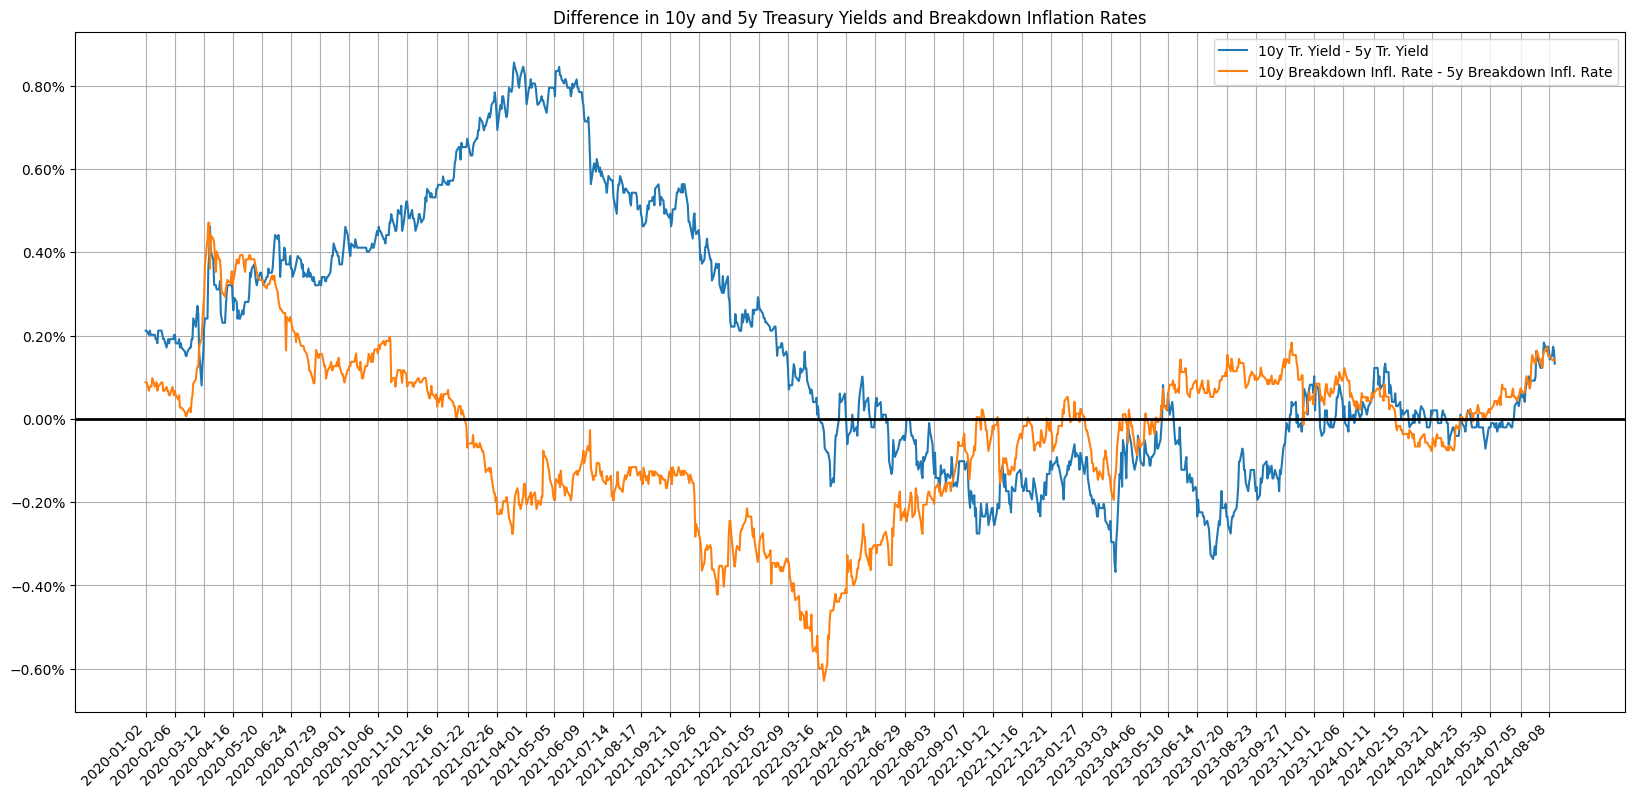

In [6]:
ax = data.iloc[:, :2].plot(
    figsize=(20, 10),
    grid=True,
    title="Difference in 10y and 5y Treasury Yields and Breakdown Inflation Rates",
    xticks=data.index[::24],
    xlabel="",
    rot=45,
)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [8]:
date_of_inversion = data.iloc[:,0][data.iloc[:,0] < 0].index[0]
date_of_inversion_peak = data.iloc[:,0].idxmin()
print(f'The inversion of 10-Year - 5-Year yield curves happened on {date_of_inversion:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,0].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The inversion amounts to {data.iloc[-1,0]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-Year - 5-Year yield curves happened on 2022-03-21
The peak of inversion was -37bps and took place on 2023-03-08
The inversion amounts to +13bps as of 2024-08-15


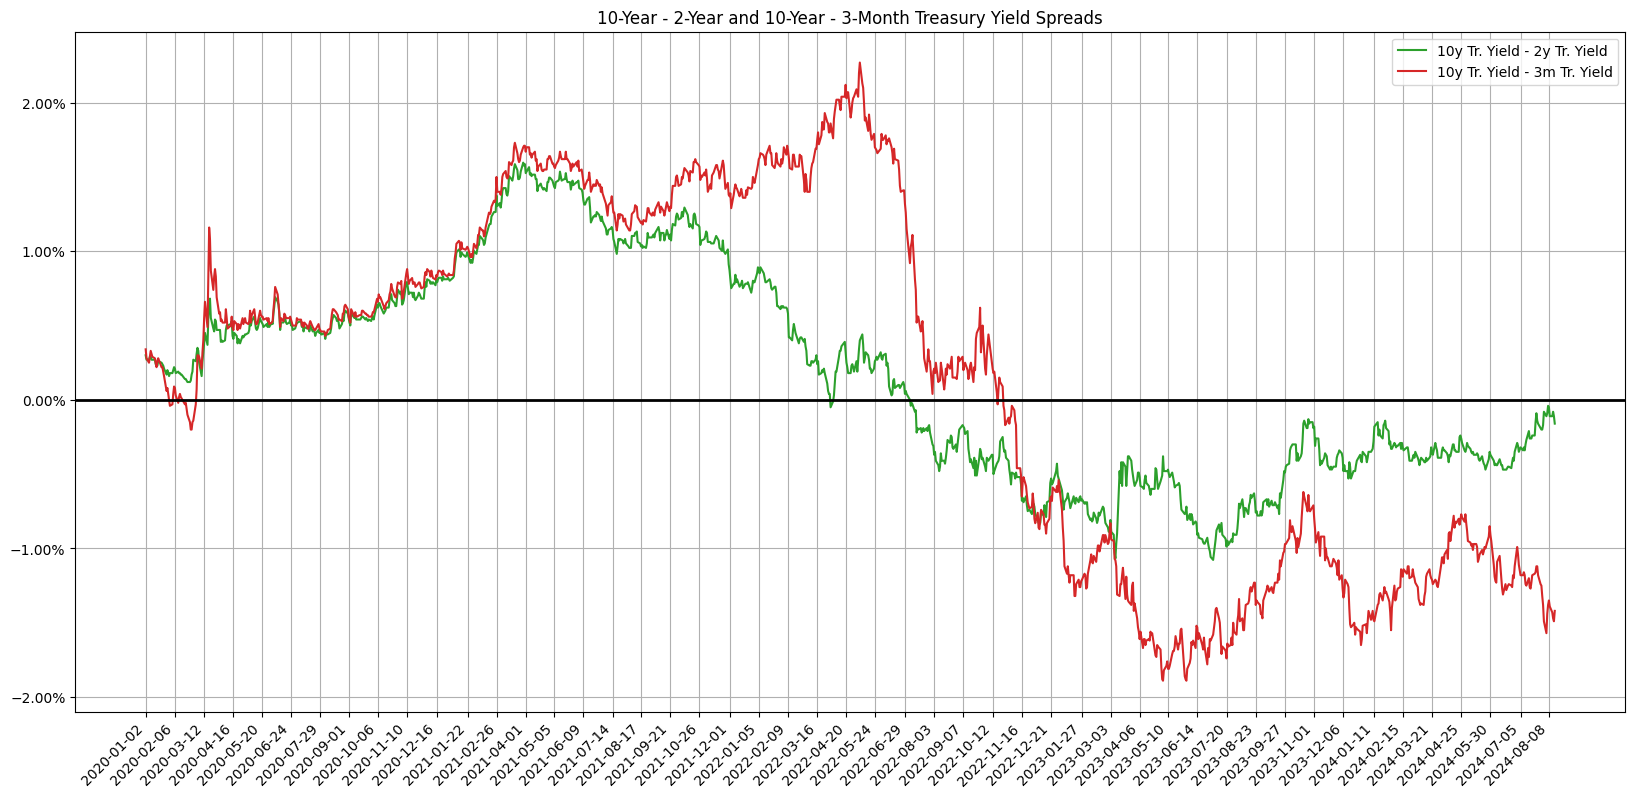

In [11]:
ax = data.iloc[:, 2:].plot(figsize=(20, 10), grid=True,
                          title='10-Year - 2-Year and 10-Year - 3-Month Treasury Yield Spreads', color=['#2ca02c', '#d62728'],
                          xticks=data.index[::24], xlabel='', rot=45)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [12]:
date_of_inversion = data.iloc[:,2][data.iloc[:,2] < 0].index[0]
date_of_inversion_peak = data.iloc[:,2].idxmin()
print(f'The inversion of 10-years - 2-Year yields curves happened on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,2].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The inversion amounts to {data.iloc[-1,2]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-years - 2-Year yields curves happened on 2023-07-03
The peak of inversion was -108bps and took place on 2023-07-03
The inversion amounts to -16bps as of 2024-08-15


In [ ]:
data2 = web.get_data_fred(['EXPINF5YR', 'T5YIEM', 'EXPINF2YR', 'T10YIEM', 'EXPINF10YR', ])